1. Import Required Libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

2. Prepare the Dataset
Features:

ph: pH level of water

Hardness: Water hardness (mg/L as CaCO3)

Solids: Total dissolved solids (ppm)

Chloramines: Chloramines concentration (ppm)

Sulfate: Sulfate concentration (mg/L)

Conductivity: Electrical conductivity (µS/cm)

Organic_carbon: Organic carbon concentration (ppm)

Trihalomethanes: Trihalomethanes concentration (µg/L)

Turbidity: Turbidity of water (NTU)

Target:
Potability: Whether water is potable (0 = not potable, 1 = potable)

2.1 Load Dataset

In [12]:
# Upload the CSV file in Google Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset (replace 'water_quality.csv' with your actual file name after upload)
df = pd.read_csv('microplastic_data.csv')  # Name it whatever you save it as

# Display the first few rows and column names
print("Dataset Preview:")
print(df.head())
print("\nColumn Names in Dataset:")
print(df.columns.tolist())

Saving microplastic_data.csv to microplastic_data (3).csv
Dataset Preview:
         ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Column Names in Dataset:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conducti

2.2 Select Features and Target Variable

In [13]:
# Handle missing values (replace empty strings or NaN with median for simplicity)
df = df.replace('', np.nan)  # Replace empty strings with NaN
df = df.fillna(df.median())   # Fill NaN with median of each column

# Select features and target
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
        'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']

# Check for missing values after preprocessing
print("Missing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


3. Train a Logistic Regression Model

3.1 Split the Dataset into Training and Testing Sets (80% Train, 20% Test)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (2620, 9)
Testing set shape: (656, 9)


3.2 Initialize and Train the Logistic Regression Model

In [15]:
# Initialize the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Train the model
log_model.fit(X_train, y_train)

# Display coefficients
print("Model Coefficients:", log_model.coef_)
print("Intercept:", log_model.intercept_)


Model Coefficients: [[-9.51408543e-03 -9.98966396e-04  8.42369911e-06  2.13315718e-02
  -7.99387490e-04 -6.84442914e-05 -1.68753394e-02  1.49189773e-03
  -1.65032551e-02]]
Intercept: [-0.00043688]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. Evaluate the Model


4.1 Predicting Potability on the Test Set

In [16]:
# Predict on the test set
y_pred = log_model.predict(X_test)

# Display a few predicted vs actual values
print("Sample Predicted vs Actual Values:")
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

Sample Predicted vs Actual Values:
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1


4.2 Evaluate the Model Performance

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.63
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


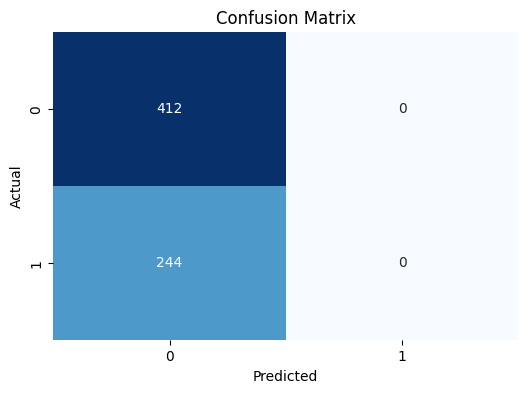

In [17]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5. Visualization

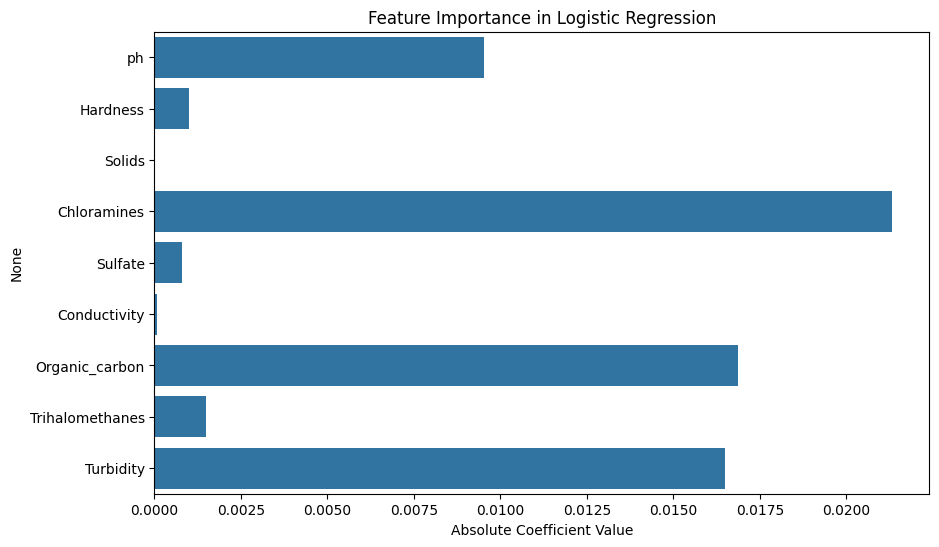

In [18]:
# Feature Importance (absolute coefficients)
feature_importance = np.abs(log_model.coef_[0])
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.show()

6. Save the Model for Later Use

In [19]:
joblib.dump(log_model, 'water_potability_model.pkl')
print("Model saved as 'water_potability_model.pkl'")

Model saved as 'water_potability_model.pkl'


7. Load and Use the Model

In [20]:
# Load the saved model
loaded_model = joblib.load('water_potability_model.pkl')

# Example: Predict on a new sample
new_sample = np.array([[7.0, 200, 20000, 7.0, 350, 400, 15, 60, 4]])  # Replace with realistic values
new_prediction = loaded_model.predict(new_sample)
print(f"Predicted Potability for new sample: {new_prediction[0]} (0 = Not Potable, 1 = Potable)")

Predicted Potability for new sample: 0 (0 = Not Potable, 1 = Potable)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
# Load the saved model (assuming it’s already saved from the previous step)
loaded_model = joblib.load('water_potability_model.pkl')

# Example 1: A sample with typical values (potentially potable)
new_sample_1 = np.array([[7.0, 200, 20000, 7.0, 350, 400, 15, 60, 4]])
prediction_1 = loaded_model.predict(new_sample_1)
print(f"Sample 1 - Predicted Potability: {prediction_1[0]} (0 = Not Potable, 1 = Potable)")
print(f"Details: ph=7.0, Hardness=200, Solids=20000, Chloramines=7.0, Sulfate=350, Conductivity=400, Organic_carbon=15, Trihalomethanes=60, Turbidity=4\n")

# Example 2: A sample with high solids and turbidity (likely not potable)
new_sample_2 = np.array([[6.5, 250, 40000, 8.0, 300, 500, 20, 90, 5.5]])
prediction_2 = loaded_model.predict(new_sample_2)
print(f"Sample 2 - Predicted Potability: {prediction_2[0]} (0 = Not Potable, 1 = Potable)")
print(f"Details: ph=6.5, Hardness=250, Solids=40000, Chloramines=8.0, Sulfate=300, Conductivity=500, Organic_carbon=20, Trihalomethanes=90, Turbidity=5.5\n")

# Example 3: A sample with low contaminants (likely potable)
new_sample_3 = np.array([[7.5, 180, 10000, 5.0, 320, 350, 10, 40, 3.0]])
prediction_3 = loaded_model.predict(new_sample_3)
print(f"Sample 3 - Predicted Potability: {prediction_3[0]} (0 = Not Potable, 1 = Potable)")
print(f"Details: ph=7.5, Hardness=180, Solids=10000, Chloramines=5.0, Sulfate=320, Conductivity=350, Organic_carbon=10, Trihalomethanes=40, Turbidity=3.0")

Sample 1 - Predicted Potability: 0 (0 = Not Potable, 1 = Potable)
Details: ph=7.0, Hardness=200, Solids=20000, Chloramines=7.0, Sulfate=350, Conductivity=400, Organic_carbon=15, Trihalomethanes=60, Turbidity=4

Sample 2 - Predicted Potability: 0 (0 = Not Potable, 1 = Potable)
Details: ph=6.5, Hardness=250, Solids=40000, Chloramines=8.0, Sulfate=300, Conductivity=500, Organic_carbon=20, Trihalomethanes=90, Turbidity=5.5

Sample 3 - Predicted Potability: 0 (0 = Not Potable, 1 = Potable)
Details: ph=7.5, Hardness=180, Solids=10000, Chloramines=5.0, Sulfate=320, Conductivity=350, Organic_carbon=10, Trihalomethanes=40, Turbidity=3.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
